In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df= pd.read_csv('Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,NaN,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape


In [ ]:
df.info()


In [ ]:
df.describe()

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors= 'coerce')

In [ ]:
df.describe()

In [28]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
#  m,onthly and ttl charges are numerical to place them use mean value
df['TotalCharges'].fillna(np.mean(df['TotalCharges']),inplace= True)
df['MonthlyCharges'].fillna(np.mean(df['MonthlyCharges']), inplace= True)

In [30]:
 #Replacing null values in monthly charges and total charges columns
df['TotalCharges'].fillna(np.mean(df['TotalCharges']), inplace = True)
df['MonthlyCharges'].fillna(np.mean(df['MonthlyCharges']), inplace=True)

In [31]:
 #Removing null values from categorical column Internet service with its mode
df.InternetService.value_counts()

InternetService
Fiber optic    3098
DSL            2420
No             1525
Name: count, dtype: int64

In [32]:
 df['InternetService'].fillna('Fiber optic', inplace=True)

# EDA

In [33]:
churncount= df['Churn'].value_counts()

In [34]:
churncount

Churn
No     5174
Yes    1869
Name: count, dtype: int64

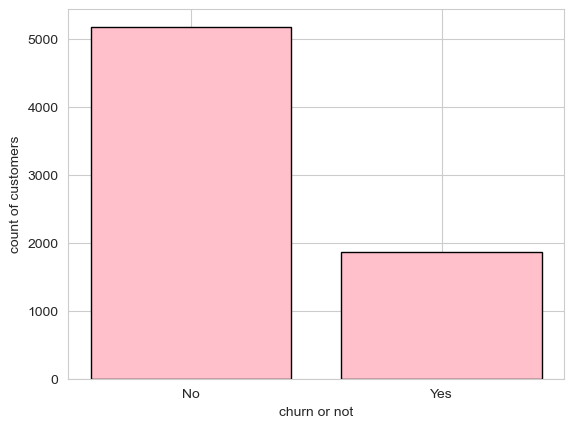

In [35]:
plt.bar(churncount.index,churncount.values,color= 'pink',edgecolor= 'black')
plt.xlabel('churn or not')
plt.ylabel('count of customers')
plt.show()

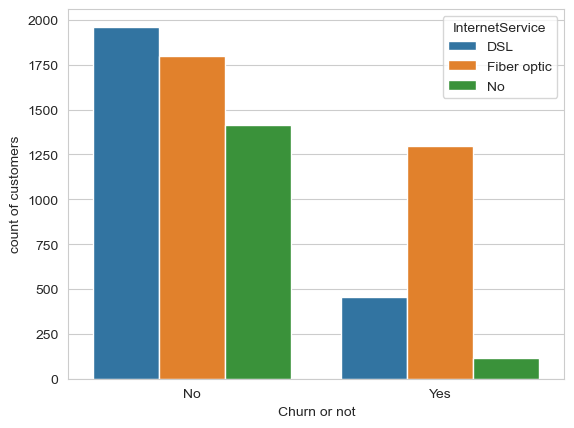

In [36]:
# diving churn statistics based contract
sns.set_style('whitegrid')
sns.countplot(x = 'Churn', hue= 'InternetService', data= df)
plt.xlabel('Churn or not')
plt.ylabel('count of customers')
plt.show()



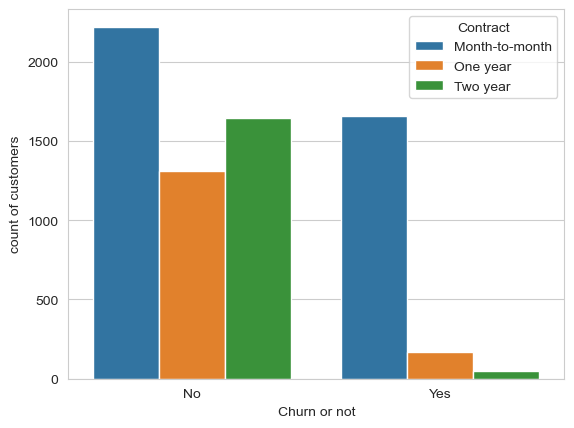

In [37]:
sns.set_style('whitegrid')
sns.countplot(x = 'Churn', hue= 'Contract', data= df)
plt.xlabel('Churn or not')
plt.ylabel('count of customers')
plt.show()

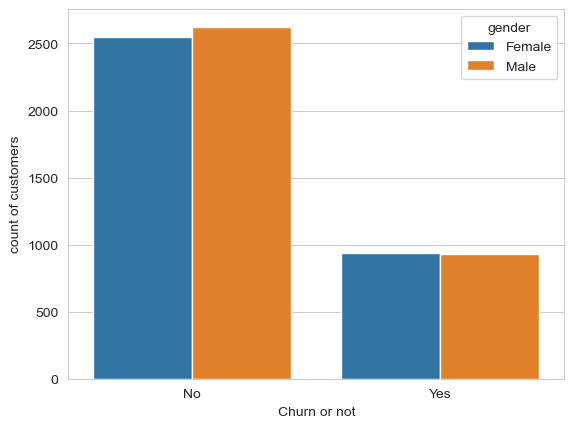

In [38]:
sns.set_style('whitegrid')
sns.countplot(x = 'Churn', hue= 'gender', data= df)
plt.xlabel('Churn or not')
plt.ylabel('count of customers')
plt.show()

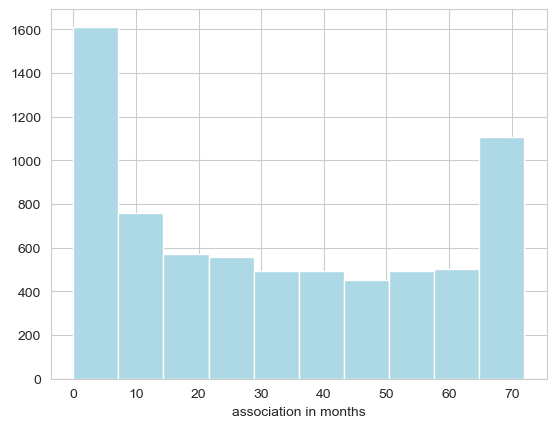

In [39]:
# distribution of tenure
plt.hist(df.tenure, color= 'lightblue')
plt.xlabel('association in months')
plt.show()

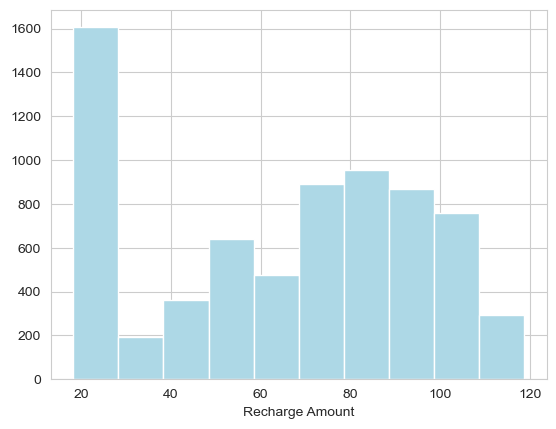

In [40]:
plt.hist(df.MonthlyCharges, color= 'lightblue')
plt.xlabel('Recharge Amount')
plt.show()

In [41]:
internet= df.InternetService.value_counts()
internet

InternetService
Fiber optic    3098
DSL            2420
No             1525
Name: count, dtype: int64

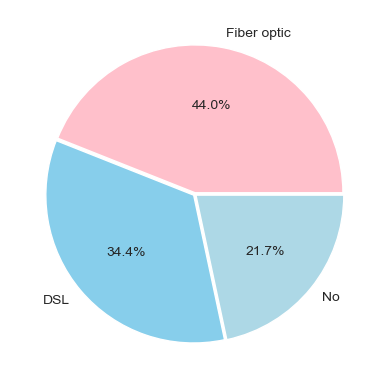

In [42]:
plt.pie(internet.values, 
        labels = internet.index, colors= ['Pink','Skyblue','Lightblue'],
        autopct = "%0.1f%%", explode = [0.01,0.01,0.01])
plt.show()

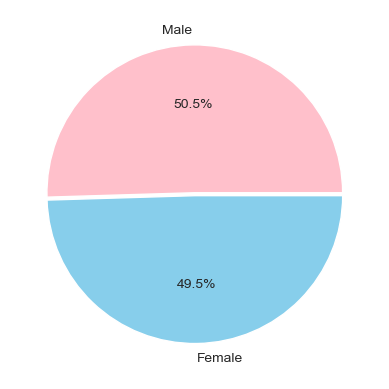

In [43]:
gen_count = df. gender. value_counts()
plt.pie(gen_count.values, labels=gen_count.index, colors = ['Pink', 'Skyblue' ],
autopct="%0.1f%%",explode=[0.01,0.01])
plt.show()

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


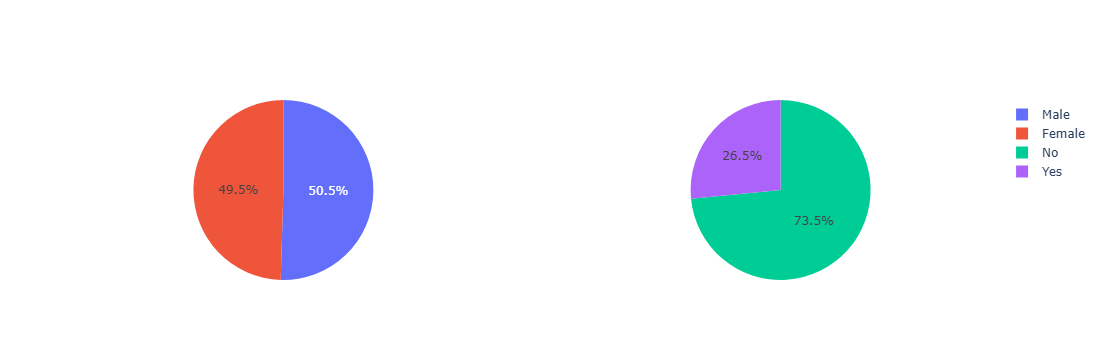

In [45]:
# advanced pie chart
gen_lab= ['Male','Female']
c_lab= ['No','Yes']
fig= make_subplots(rows=1,cols= 2, specs=[[{'type':'domain'}, {"type":'domain'}]])
fig.add_trace(go.Pie(labels=gen_lab, values= df['gender'].value_counts(), name='Gender'),1,1)
fig.add_trace(go.Pie(labels=c_lab, values= df['Churn'].value_counts(), name='Churn'),1,2)

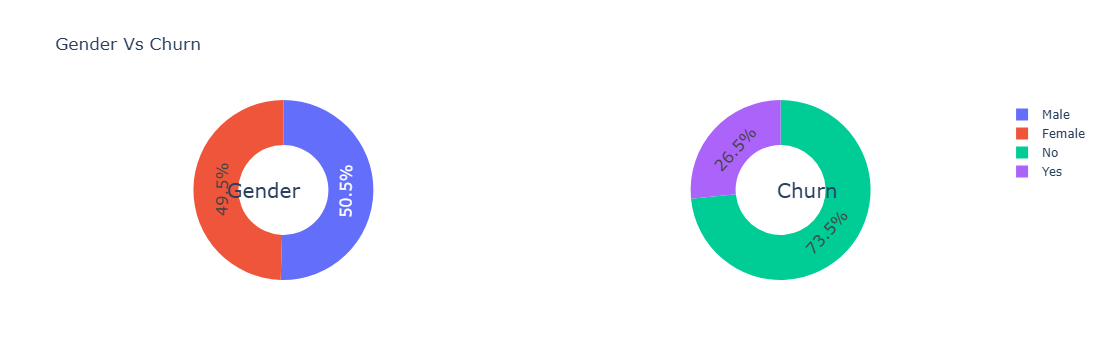

In [46]:

#Advanced pi chart
gen_lab = ['Male','Female']
c_lab = ['No','Yes']
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=gen_lab, values=df['gender'].value_counts(), name='Gender'),1,1)

fig.add_trace(go.Pie(labels=c_lab, values = df['Churn'].value_counts(), name = 'Churn'), 1,2)

#Converting above Pie chart into doughnut chart
fig.update_traces(hole = .5, hoverinfo = 'label+percent+value+name', textfont_size = 16)

fig.update_layout(title_text = 'Gender Vs Churn', annotations = [dict(text = 'Gender', x = 0.16,
y=0.5, font_size = 20,
showarrow = False),
dict(text='Churn', x= 0.84,
y=0.5, font_size = 20,
showarrow=False)])
fig.show()

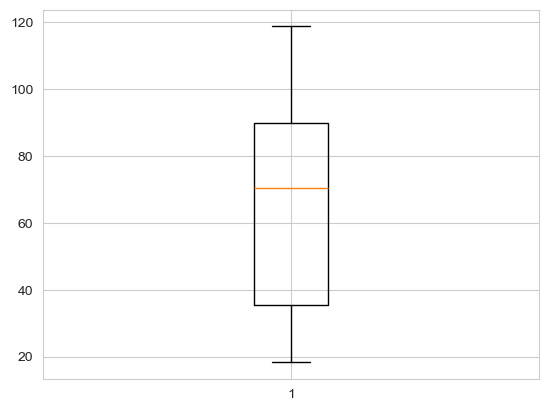

In [48]:
plt.boxplot(df.MonthlyCharges)
plt.show()

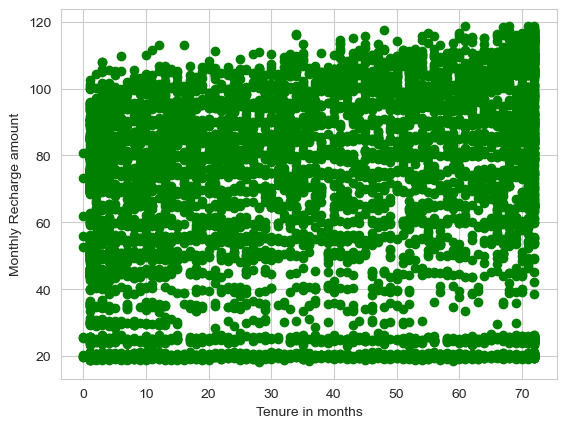

In [49]:

#Finding relationship of tenure and monthly charges
plt. scatter(df.tenure, df. MonthlyCharges, color = 'Green')
plt.xlabel ('Tenure in months')
plt.ylabel ("Monthly Recharge amount")
plt.show()

In [ ]:
#Show average Monthly charges done for each type of Internet service
#show average monthly charge for each type of contract
#Find number of customers doing One year or two years recharge using contract info.
#Find customers doing Internet baking for bilL payments